In [117]:
import numpy as np
import pandas as pd
import random
import math
from math import sqrt
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason, modelTuner


import statsmodels as sm
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## load data

In [118]:
data=pd.read_csv("h2weekly.csv")

In [119]:
data

,Date,IsCanceled
0,2015-06-21,97
1,2015-06-28,153
2,2015-07-05,228
3,2015-07-12,321
4,2015-07-19,159
...,...,...
110,2017-07-30,253
111,2017-08-06,269
112,2017-08-13,341
113,2017-08-20,201


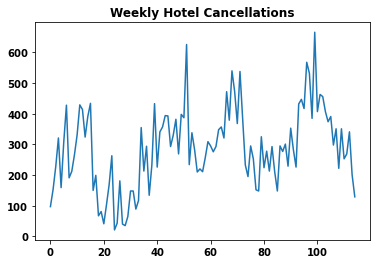

In [120]:
plt.plot(data.IsCanceled)
plt.title("Weekly Hotel Cancellations")
plt.show()

## autocorrelation and parcial autocorrelation

In [121]:
acf(data.IsCanceled, nlags=100)

C:\Users\maerz\anaconda3\envs\bayes\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00,  5.92888954e-01,  5.48850205e-01,  5.37000712e-01,
        4.31682822e-01,  3.25961139e-01,  2.17584692e-01,  1.92590932e-01,
        2.17882282e-01,  8.76673637e-02, -6.57767423e-03, -4.37376375e-02,
       -5.35017367e-02, -1.07476228e-01, -2.38858036e-01, -1.33530318e-01,
       -1.19857607e-01, -8.15091354e-02, -1.29787212e-01, -1.02581967e-01,
       -3.72644614e-02, -7.80160550e-02, -8.68811589e-02, -9.56165589e-02,
        3.17330180e-02,  5.81209235e-02,  7.98602439e-04,  7.07480396e-02,
        2.12908026e-01,  1.31543365e-01,  1.40459741e-01,  5.41431532e-02,
        9.36674861e-02,  7.35118941e-02, -1.65770420e-02, -1.55873812e-02,
        5.79842884e-02,  3.08998448e-02, -7.91610715e-02, -1.13521728e-01,
       -8.99399166e-02, -1.42665885e-01, -1.98968447e-01, -1.69370651e-01,
       -1.43395429e-01, -4.19013527e-02, -6.98633908e-02, -8.33128327e-02,
        2.12559282e-02,  5.84639607e-03, -6.12823731e-04,  1.23748147e-02,
        1.17913156e-01,  

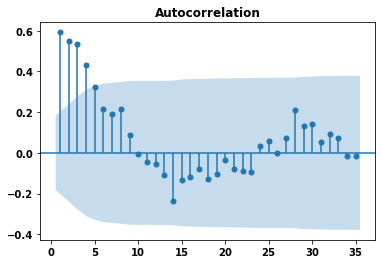

In [122]:
plot_acf(data.IsCanceled, lags=35, zero=False)
plt.show()

In [123]:
pacf(data.IsCanceled, nlags=56)

array([ 1.00000000e+00,  5.98089735e-01,  3.12714589e-01,  2.32537726e-01,
        5.92632736e-04, -1.09933975e-01, -1.67666843e-01, -3.69099953e-04,
        1.85228798e-01, -8.08323855e-02, -2.09016331e-01, -1.75795670e-01,
        2.52595193e-02,  7.08978524e-02, -1.81057918e-01,  1.19230690e-01,
        6.17113635e-02,  2.10950985e-01, -8.59909491e-02, -1.04198566e-01,
       -1.53929243e-02, -2.88803600e-02,  9.54292050e-02, -1.56298142e-01,
        2.04974346e-01,  9.97655564e-02, -5.55447504e-02,  3.81287988e-03,
        2.65424263e-01,  1.21126660e-02, -6.45248686e-02, -3.47808853e-01,
       -1.88535317e-01,  6.25588835e-02,  7.28708912e-02, -3.09894369e-02,
        1.31294136e-01,  6.13878052e-02, -1.71383033e-01, -2.71885431e-01,
       -2.82290579e-02,  5.03361355e-02,  1.58367939e-01,  1.01192203e-01,
       -5.72198551e-02,  2.22693043e-01,  1.83020886e-01, -2.27374443e-01,
        2.31925169e-02,  4.01134604e-02,  2.56214562e-01,  1.35157485e-01,
        8.99139009e-02, -

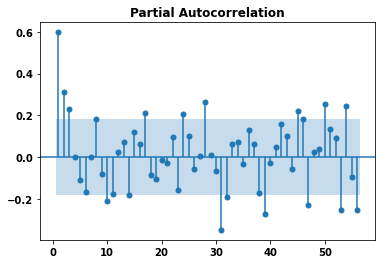

In [124]:
plot_pacf(data.IsCanceled, lags=56, zero=False)
plt.show()

# Milestone 1
## Bayesian Model without dynamic or automatic components¶

In [125]:
# A linear trend
linear_trend = trend(degree=1, discount=0.95, name='linear_trend', w=10)
# A seasonality
seasonal28 = seasonality(period=28, discount=0.99, name='seasonal28', w=10)
# Build a simple dlm
simple_dlm = dlm(data.IsCanceled) + linear_trend + seasonal28

In [126]:
# Fit the model
simple_dlm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


C:\Users\maerz\anaconda3\envs\bayes\lib\site-packages\pydlm\plot\dlmPlot.py:519: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(size[0]) + str(size[1]) + str(location))


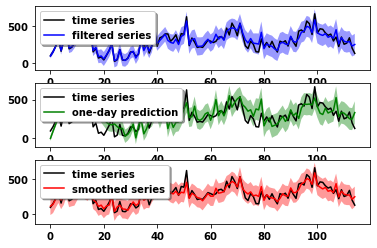

In [127]:
# Plot the fitted results
simple_dlm.turnOff('data points')
simple_dlm.plot()

In [128]:
simple_dlm
simple_dlm.ls()

The static components are
linear_trend (degree = 2)
seasonal28 (degree = 28)
 
There is no dynamic component.
 
There is no automatic component.


In [129]:
np.sqrt(simple_dlm.getMSE())

113.69396928037527

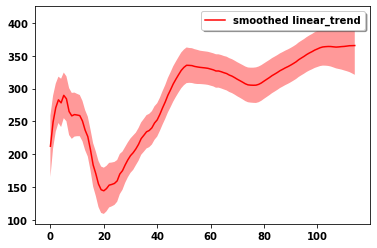

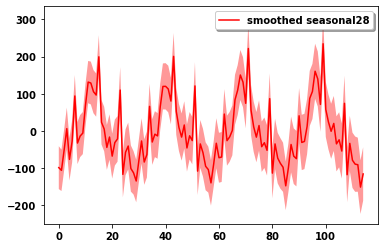

In [130]:
# Plot each component (attribute the time series to each component)
simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot('linear_trend')
simple_dlm.plot('seasonal28')

### prediction

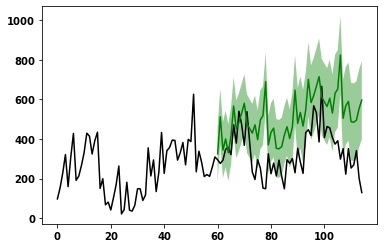

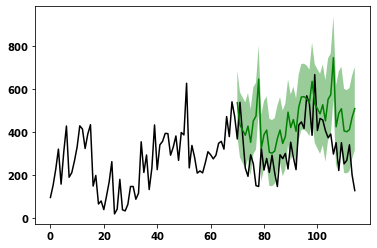

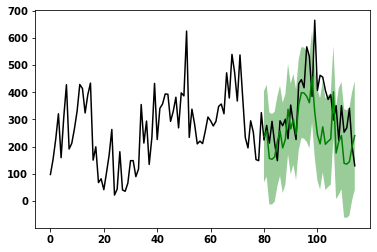

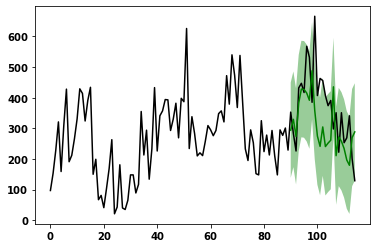

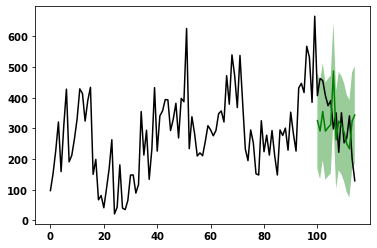

In [131]:
# Plot the prediction give the first x weeks and forecast the remaing to 115
for i in [60,70,80,90,100]:
    simple_dlm.plotPredictN(date=i, N=(115-i))
    plt.show()

In [132]:
range(60,15,130)

range(60, 15, 130)

In [133]:
#The function returns a tuple of predicted mean and predicted variance.
pred15=simple_dlm.predictN(date=100, N=15)
pred15

([325.46635473906133,
  291.62625922266886,
  355.1542757876713,
  291.24030015319215,
  302.76778835773894,
  312.3700838478139,
  487.0312740952397,
  262.4768567646968,
  323.90109147500925,
  310.34639422096876,
  287.1441839715543,
  250.18865662988892,
  233.45594755702766,
  324.4499030732357,
  343.74748875272775],
 [6466.937350069287,
  6508.133636208618,
  6543.976547136525,
  6575.77546866596,
  6604.31871625643,
  6630.053643520267,
  6653.184350073604,
  6673.714713826845,
  6691.446409336731,
  6705.928261365736,
  6716.339508033633,
  6592.739765334474,
  6561.988010550666,
  6561.997706096649,
  6565.50681757574])

In [158]:
#mean
mean_pred=np.mean(pred15[0])
print(f'Mean {mean_pred}')
# mse of pred vs test
mse = mean_squared_error(data.IsCanceled[100:], pred15[0])
rmse = sqrt(mse)
print(f'RMSE: {rmse}')

Mean 313.424457243233
RMSE: 115.72699179745337


# Milestone 2
## Bayesian model with dynamic and automatic components

In [136]:
dyn_dlm = dlm(data.IsCanceled)
dyn_dlm = dyn_dlm + trend(1, name='lineTrend', w=1.0)
dyn_dlm = dyn_dlm + seasonality(28, name='11wks', w=1.0)
dyn_dlm = dyn_dlm + autoReg(degree=2,  name='ar2', w=1.0)

In [137]:
# introduce dynamic component
features = [[1.0, 2.0] for i in range(115)]
ctrend = dynamic(features = features, name = 'random', discount = 0.9)
dyn_dlm = dyn_dlm + ctrend

In [138]:
# show the added components
dyn_dlm.ls()

The static components are
lineTrend (degree = 2)
11wks (degree = 28)
 
The dynamic components are
random (dimension = 2)
 
The automatic components are
ar2 (dimension = 2)


In [139]:
#fit model
dyn_dlm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [140]:
#fit forward filter and backward smoother
dyn_dlm.fitForwardFilter()
dyn_dlm.fitBackwardSmoother()

Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...


C:\Users\maerz\anaconda3\envs\bayes\lib\site-packages\pydlm\plot\dlmPlot.py:519: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(size[0]) + str(size[1]) + str(location))


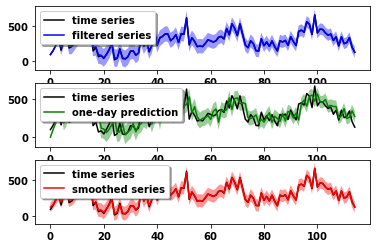

In [141]:
dyn_dlm.turnOff('data points')
dyn_dlm.plot()

In [142]:
dyn_dlm.turnOn('smoothed plot')
dyn_dlm.turnOff('predict')

In [143]:
myTuner = modelTuner(method='gradient_descent', loss='mse')
tunedDLM = myTuner.tune(dyn_dlm, maxit=100)

The algorithm stops without converging.
Possible reason: some discount is too close to 1 or 0.7 (0.7 is smallest discount that is permissible.


In [145]:
dyn_dlm_mse = dyn_dlm.getMSE()
tunedDLM.fit()

In [146]:
dyn_dlm_mse

12105.541458256064

In [147]:
tunedDLM_mse = tunedDLM.getMSE()
tunedDLM_mse

11546.747154615427

In [148]:
sqrt(tunedDLM_mse)

107.45579162900168

### Forecast Interpretation

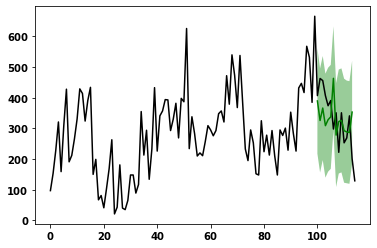

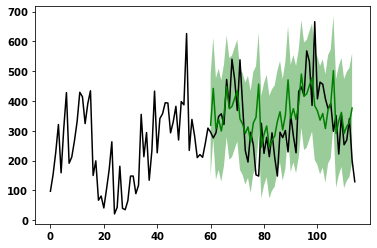

In [149]:
# Plotted prediction for the first 100 weeks, with a forecast generated for the following 14 weeks.
tunedDLM.plotPredictN(date=100, N=14)
# Plotted prediction for the first 60 weeks, with a forecast generated for the following 54 weeks.
tunedDLM.plotPredictN(date=60, N=54)

In [161]:
#The function returns a tuple of predicted mean and predicted variance.
dyn_pred14=dyn_dlm.predictN(date=100, N=14)
dyn_pred14

([459.3176023139273,
  452.53554558244343,
  486.21152121821456,
  461.1376304313056,
  491.8518685263127,
  496.2957807334088,
  575.3547192688296,
  462.32648918520005,
  511.9765072330026,
  546.8289351101997,
  514.4960567229755,
  504.803527295968,
  526.4151395565027,
  567.8247660519185],
 [83243.11523016977,
  82570.36532882541,
  83229.18223009763,
  83744.92035988047,
  84612.33687350377,
  85303.80749767445,
  86275.43916901416,
  87228.232807573,
  88958.46425134758,
  89909.78258866082,
  91331.05157089839,
  93238.68066896706,
  94732.04178811416,
  96232.11280721097])

In [162]:
#mean
mean_pred=np.mean(dyn_pred14[0])
print(f'Mean {mean_pred}')
# mse of pred vs test
mse = mean_squared_error(data.IsCanceled[100:114], dyn_pred14[0])
rmse = sqrt(mse)
print(f'RMSE: {rmse}')

Mean 504.098292087872
RMSE: 195.73009256876827
